
Reading from mastodon_output.ndjson...
Loaded 160 posts

Top 20 Keywords (after stopword removal):
https: 69
2025: 38
mesonet: 14
agron: 14
iastate: 14
utm_source: 11
utm_medium: 11
board: 9
vtec: 8
19t06: 8
news: 8
watch: 8
snow: 8
radio: 7
trump: 7
uttarakhand: 7
berlin: 7
post: 7
shoulder: 7
theindiebeat: 6


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\41350\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


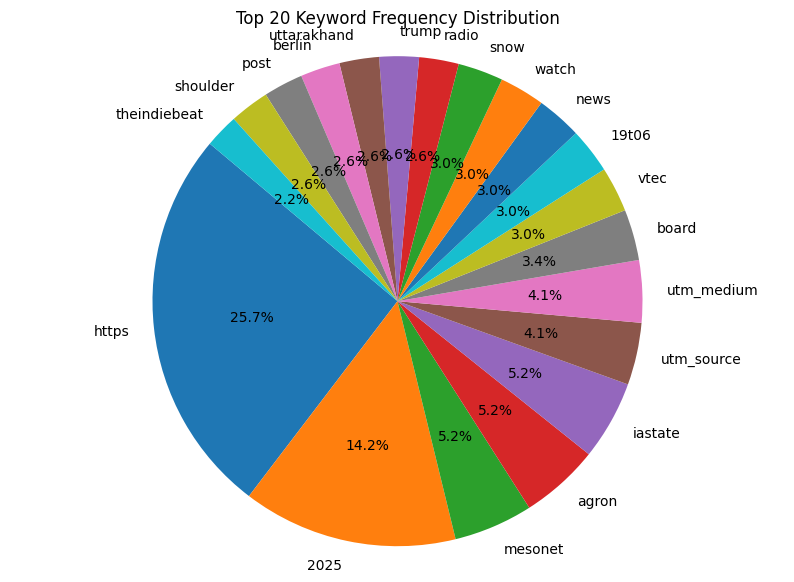


Sentiment Analysis Result: {'positive': 36, 'neutral': 75, 'negative': 49}


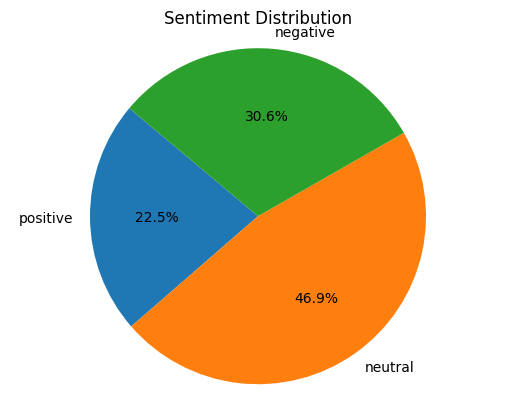

In [5]:
import os
import json
import re
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

DATA_FILE = "mastodon_output.ndjson"


def load_posts(file_path):
    if not os.path.exists(file_path):
        print(f"File '{file_path}' not found.")
        return []
    with open(file_path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f if line.strip()]


def clean_html(html):
    return BeautifulSoup(html, "html.parser").get_text()


def extract_keywords(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return [w for w in words if len(w) > 3 and w not in stop_words]


def sentiment_analysis(texts):
    analyzer = SentimentIntensityAnalyzer()
    scores = {"positive": 0, "neutral": 0, "negative": 0}
    for text in texts:
        score = analyzer.polarity_scores(text)
        if score['compound'] >= 0.05:
            scores["positive"] += 1
        elif score['compound'] <= -0.05:
            scores["negative"] += 1
        else:
            scores["neutral"] += 1
    return scores


def main():
    print(f"\nReading from {DATA_FILE}...")
    posts = load_posts(DATA_FILE)
    print(f"Loaded {len(posts)} posts")

    contents = [clean_html(p["doc"]["content"]) for p in posts if p["doc"].get("content")]

    all_words = []
    for text in contents:
        all_words.extend(extract_keywords(text))

    word_freq = Counter(all_words)
    top_20 = word_freq.most_common(20)

    print("\nTop 20 Keywords (after stopword removal):")
    for word, freq in top_20:
        print(f"{word}: {freq}")

    labels = [item[0] for item in top_20]
    sizes = [item[1] for item in top_20]
    plt.figure(figsize=(10, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Top 20 Keyword Frequency Distribution")
    plt.axis('equal')
    plt.show()

    sentiment = sentiment_analysis(contents)
    print("\nSentiment Analysis Result:", sentiment)
    plt.pie(sentiment.values(), labels=sentiment.keys(), autopct='%1.1f%%', startangle=140)
    plt.title("Sentiment Distribution")
    plt.axis('equal')
    plt.show()

if __name__ == "__main__":
    main()
